# AYUSH VERMA

ID: 1477941c2441f000

---

STAGE C: MACHINE LEARNING: CLASSIFICATION - MANAGING THE QUALITY METRIC OF GLOBAL ECOLOGICAL FOOTPRIN

---

Dataset ( [Electrical Grid Stability Simulated DataSet ](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+))

It has 12 primary predictive features and two dependent variables.

1. Predictive features:

* **'tau1'** to **'tau4'**: the reaction time of each network participant

* **'p1'** to **'p4'**: nominal power produced (positive) or consumed (negative) by each network participant

* **'g1'** to **'g4'**: price elasticity coefficient for each network participant

2. Dependent variables:

* **'stab'**: the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);

* **'stabf'**: a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise)



---



# ALL THE QUESTIONS AND ANSWERS ARE AT THE END OF THE NOTEBOOK

---

## Importing Libraries

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Encoder
import sklearn.utils
from sklearn.preprocessing import LabelEncoder

#Sampling and Scaling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

## Importing dataset and preprocessing

In [2]:
#Loading the dataset
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
#Seeing the top of our dataframe
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
#Finding the null values and dtypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
#Finding min,max and mean values of each feature
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
#Finding the total null values in each column 
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

There are 0 null values and except for stabf, all the other features are of numeric type.

In [7]:
#Finding Categorical columns
for i in df:
  a=df[i].unique()
  if len(a)<10:
    print(f"{i} feature has {a} unique values")

stabf feature has ['unstable' 'stable'] unique values


So only stabf feature is categorical and we'll use this feature for binary classification

##### Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

In [8]:
#Dropping the stab column
df = df.drop(['stab'], axis=1)

In [9]:
#Looking at the top of this new dataframe
df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable


## Create LabelEncoders for columns with object dtypes

In [10]:
df = sklearn.utils.shuffle(df)
encoder = LabelEncoder()
df['stabf'] = encoder.fit_transform(df['stabf'])
print(f"{'stabf'} feature has {df['stabf'].unique()} unique values")

stabf feature has [1 0] unique values


In [11]:
X=df.drop('stabf',axis=1)
Y=df['stabf']

## Splitting, Sampling and Scaling

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

In [13]:
Y_train.value_counts()

1    5095
0    2905
Name: stabf, dtype: int64

In [14]:
smote = SMOTE(random_state=1)
x_train_balanced, y_train_balanced = smote.fit_resample(X_train, Y_train)

In [15]:
y_train_balanced.value_counts()

1    5095
0    5095
Name: stabf, dtype: int64

In [16]:
sc = StandardScaler()
Sc_x_train_balanced = sc.fit_transform(x_train_balanced)
Sc_x_test = sc.transform(X_test)

## Random Forest

In [17]:
rf = RandomForestClassifier(random_state=1)

In [18]:
rf.fit(Sc_x_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=1)

In [19]:
rf_y = rf.predict(Sc_x_test)

### Cross Validation

In [20]:
print('Accuracy : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = rf_y)))

Accuracy : 0.9105


In [21]:
def f1score(predd):
  f1 = f1_score(y_true=Y_test, y_pred=predd)
  print( 'F1: {}' .format(round(f1* 100 ), 2 )) 

In [22]:
f1score(rf_y)

F1: 93


In [23]:
def plot_cnf(predic,matrix):
  plt.figure(figsize=(7,5))
  sns.heatmap(matrix, annot=True, fmt='.3f', linewidths='.5', square=True, cmap='Blues_r');
  plt.xlabel('Predicted Label');
  plt.ylabel('Actual Label');
  title = 'Accuracy Score: {0:.4f}'.format(accuracy_score(y_true=Y_test, y_pred=predic))
  plt.title(title, size=20);

In [24]:
mat_rf = confusion_matrix(y_true= Y_test, y_pred=rf_y)
mat_rf

array([[ 631,   84],
       [  95, 1190]])

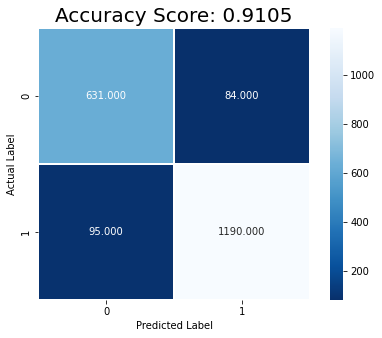

In [25]:
plot_cnf(rf_y,mat_rf)

## ExtraTreesClassifier

In [26]:
ETC_model = ExtraTreesClassifier(random_state=1)

In [27]:
ETC_model.fit(Sc_x_train_balanced, y_train_balanced)

ExtraTreesClassifier(random_state=1)

In [28]:
ETC_y = ETC_model.predict(Sc_x_test)

### Cross Validation

In [29]:
print ('Accuracy_XTC : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = ETC_y)))

Accuracy_XTC : 0.9250


In [30]:
f1score(ETC_y)

F1: 94


In [31]:
mat_etc = confusion_matrix(y_true= Y_test, y_pred=ETC_y)
mat_etc

array([[ 644,   71],
       [  79, 1206]])

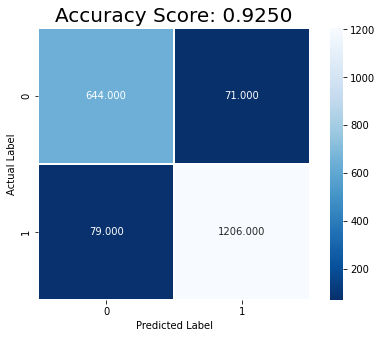

In [32]:
plot_cnf(ETC_y,mat_etc)

## Extreme Gradient Boosting(XGB)

In [33]:
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(Sc_x_train_balanced, y_train_balanced)

XGBClassifier(random_state=1)

In [34]:
xgb_y = xgb_model.predict(Sc_x_test)

### Cross Validation

In [35]:
print ('Accuracy_xgb : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = xgb_y)))

Accuracy_xgb : 0.9085


In [36]:
f1score(xgb_y)

F1: 93


In [37]:
mat_xgb = confusion_matrix(y_true= Y_test, y_pred=xgb_y)
mat_xgb

array([[ 646,   69],
       [ 114, 1171]])

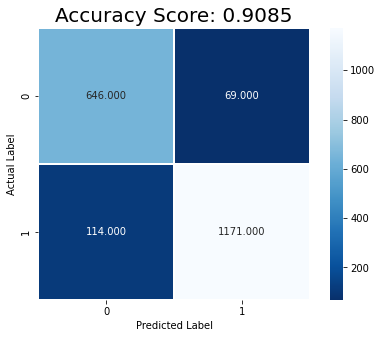

In [38]:
plot_cnf(xgb_y,mat_xgb)

## Light Gradient Boosting Model

In [39]:
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(Sc_x_train_balanced, y_train_balanced)

LGBMClassifier(random_state=1)

In [40]:
lgb_y = lgb_model.predict(Sc_x_test)

### Cross Validation

In [58]:
print ('Accuracy_lgb : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = lgb_y)))

Accuracy_lgb : 0.9340


In [42]:
f1score(lgb_y)

F1: 95


In [43]:
mat_lgb = confusion_matrix(y_true= Y_test, y_pred=lgb_y)
mat_lgb

array([[ 653,   62],
       [  70, 1215]])

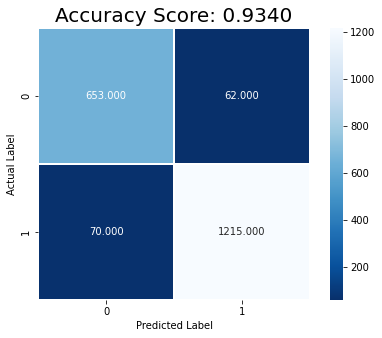

In [44]:
plot_cnf(lgb_y,mat_lgb)

## RandomisedSearchCV

In [61]:
# specify the parameter distribution to checked
param_dist = {
    'n_estimators' : [50, 100, 300, 500, 1000],
    'min_samples_split' : [2, 3, 5, 7, 9],
    'min_samples_leaf' : [1, 2, 4, 6, 8],
    'max_features' : ['auto', 'sqrt', 'log2', None] 
}

classifier = ExtraTreesClassifier()

random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,random_state = 1)

In [93]:
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [94]:
random_search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

## Feature Selection using ExtraTrees

In [48]:
classifier = ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=8, n_estimators=1000)

In [49]:
score = cross_val_score(classifier, X,Y, cv=10)
score

array([0.934, 0.921, 0.921, 0.916, 0.92 , 0.931, 0.932, 0.941, 0.933,
       0.939])

In [50]:
score.mean()

0.9288000000000001

In [88]:
# train the model with the predictors(X) and target(Y) of the train dataset
classifier.fit(X, Y)

# using the fitted classifier object, obtain the feature importances
feature_Selection = classifier.feature_importances_

In [89]:
ETC_y_hyper = classifier.predict(Sc_x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
feature_Selection

array([0.13274925, 0.13413848, 0.12740812, 0.13115577, 0.01964455,
       0.02211209, 0.0219431 , 0.02182384, 0.09074498, 0.09769558,
       0.10548101, 0.09510323])

In [53]:
# Normalise the individual features
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        classifier.estimators_], 
                                        axis = 0) 

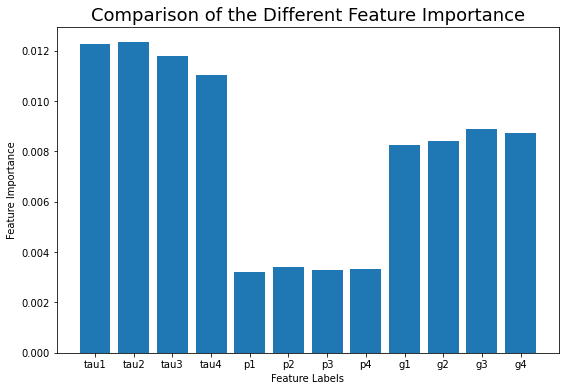

In [54]:
plt.figure(figsize=(9,6))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Comparison of the Different Feature Importance', size=18)
plt.show()

---

#Question 2

### What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [57]:
print ('Accuracy of the XGBoost Classifier is : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = xgb_y)))

Accuracy of the XGBoost Classifier is : 0.9085


### Answer
Accuracy of the XGBoost Classifier is : 0.9085

---

# Question 8

### What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [59]:
print ('Accuracy of the LGBM Classifier is :  {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = lgb_y)))

Accuracy of the LGBM Classifier is :  0.9340


### Answer
Accuracy of the LGBM Classifier is :  0.9340

---

# Question 12

### Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [68]:
random_search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

### Answer
N_estimators = 1000 , min_samples_split = 2 , min_samples_leaf = 8, max_features = None

---

# Question 16

### What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [64]:
print('Accuracy of the Random Forest Classifier is : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = rf_y)))

Accuracy of the Random Forest Classifier is : 0.9105


### Answer
Accuracy of the Random Forest Classifier is : 0.9105

---

# Question 17

### Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

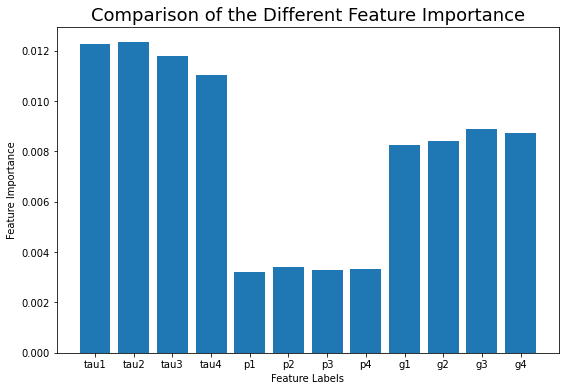

In [82]:
plt.figure(figsize=(9,6))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Comparison of the Different Feature Importance', size=18)
plt.show()

### Answer
As we can see in the graph,
tau2 has the highest importance while
p1 has the least importance

---

# Question 20

### Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [84]:
# Old ExtraTrees Accuracy
print ('Accuracy of old ExtraTrees Classifier : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = ETC_y)))

Accuracy of old ExtraTrees Classifier : 0.9250


In [96]:
#New

print("New Score is : {:0.4f}".format(score.mean()))

New Score is : 0.9288


### Answer
As we can clearly see, that the scores have changed

---

# THANK YOU